In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [10]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)
data.drop(['Open','High','Low','Volume'],axis=1, inplace = True)
data = data.droplevel(0, axis=1).resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [11]:
rets = data.pct_change().fillna(0)
rets

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-10 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-17 00:00:00+00:00,-0.032073,-0.017247,-0.018397,-0.006154,-0.016493,0.007527,0.006185,0.013845,-0.013491
2010-01-24 00:00:00+00:00,-0.064201,-0.049950,-0.050870,-0.042311,-0.044130,-0.017930,-0.035264,-0.017380,-0.032021
2010-01-31 00:00:00+00:00,-0.047107,-0.031972,0.000000,-0.016523,-0.032318,-0.003423,-0.009724,-0.012003,-0.003791
2010-02-07 00:00:00+00:00,0.011281,-0.004771,-0.016925,-0.006574,0.005248,-0.008397,-0.020657,-0.014386,-0.004842
...,...,...,...,...,...,...,...,...,...
2024-08-18 00:00:00+00:00,0.022697,0.011855,0.032311,0.021645,0.076691,0.017183,0.011276,0.019269,0.050419
2024-08-25 00:00:00+00:00,0.023849,-0.000884,0.015079,0.018193,0.011563,0.016520,0.013165,0.016877,0.025883
2024-09-01 00:00:00+00:00,0.016715,0.009846,0.029485,0.016863,-0.016208,0.008187,0.011535,0.011258,-0.003992


In [12]:
port_rets = rets.mean(axis=1)
port_rets

Date
2010-01-10 00:00:00+00:00    0.000000
2010-01-17 00:00:00+00:00   -0.008478
2010-01-24 00:00:00+00:00   -0.039340
2010-01-31 00:00:00+00:00   -0.017429
2010-02-07 00:00:00+00:00   -0.006669
                               ...   
2024-08-18 00:00:00+00:00    0.029261
2024-08-25 00:00:00+00:00    0.015583
2024-09-01 00:00:00+00:00    0.009299
2024-09-08 00:00:00+00:00   -0.033101
2024-09-15 00:00:00+00:00    0.016290
Freq: W-SUN, Length: 767, dtype: float64

<Axes: xlabel='Date'>

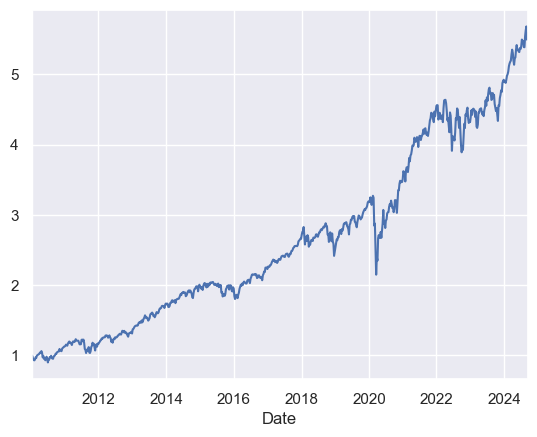

In [13]:
(1 + port_rets).cumprod().plot()

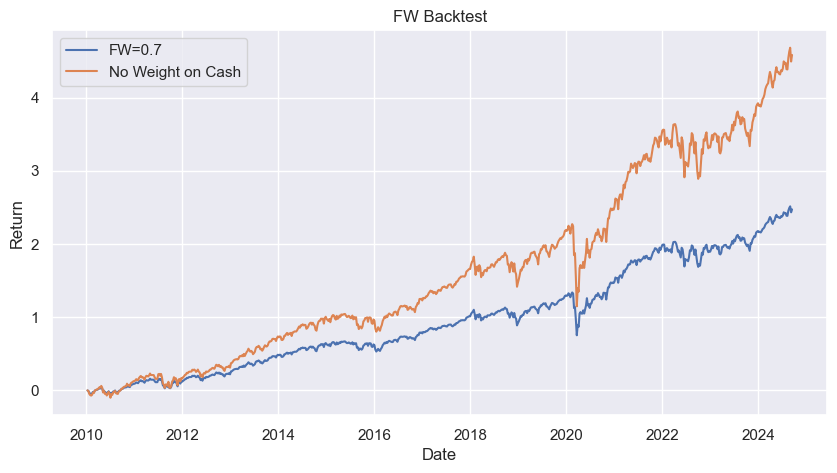

In [14]:
# fixed weight = 70% , Cash = 30%
fw_weights = 0.7
fw_rets = fw_weights*port_rets
fw_cum_rets = (1+fw_rets).cumprod() -1
port_cum_rets = (1+port_rets).cumprod() -1

plt.figure(figsize=(10, 5))
plt.plot(fw_cum_rets, label=f'FW={fw_weights}')
plt.plot(port_cum_rets, label='No Weight on Cash')
plt.title('FW Backtest')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
